Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# You have to include the full link to the csv file containing your dataset

creditcard_df = pd.read_csv('Marketing_data.csv')


# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Let's see who made one off purchase of $40761!

creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALISE AND EXPLORE DATASET

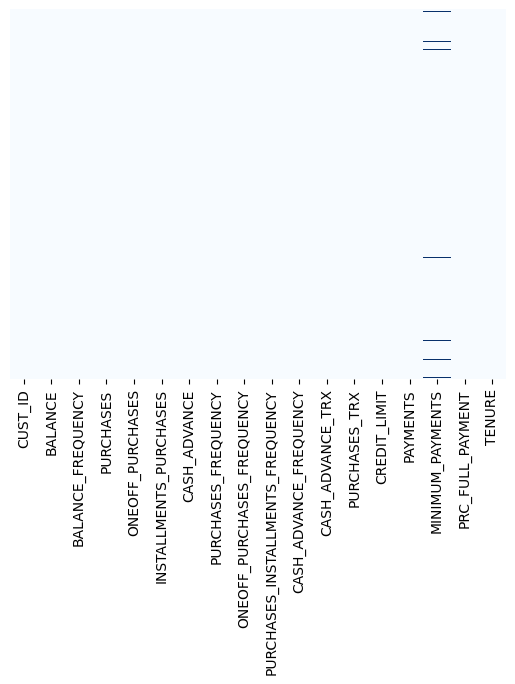

In [ ]:
# Let's see if we have any missing data, luckily we don't!

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

In [ ]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'

creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'

creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

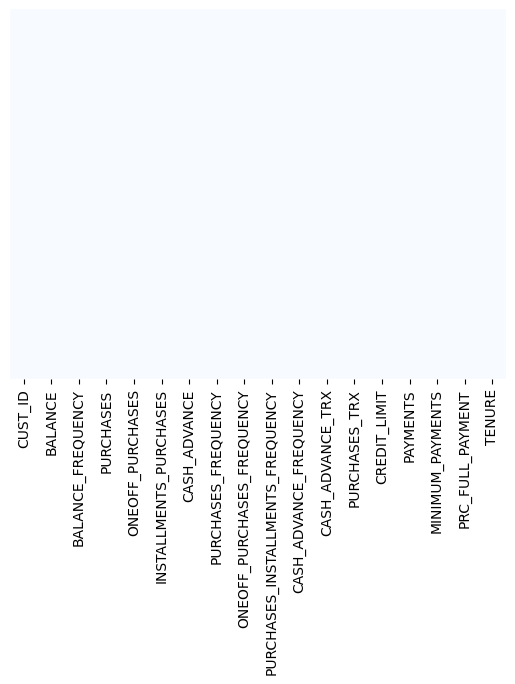

In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Let's see if we have duplicated entries in the data

creditcard_df.duplicated().sum()

0

In [ ]:
# Let's drop Customer ID since it has no meaning here

creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-107-9e964659878e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-107-9e964659878e>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[c

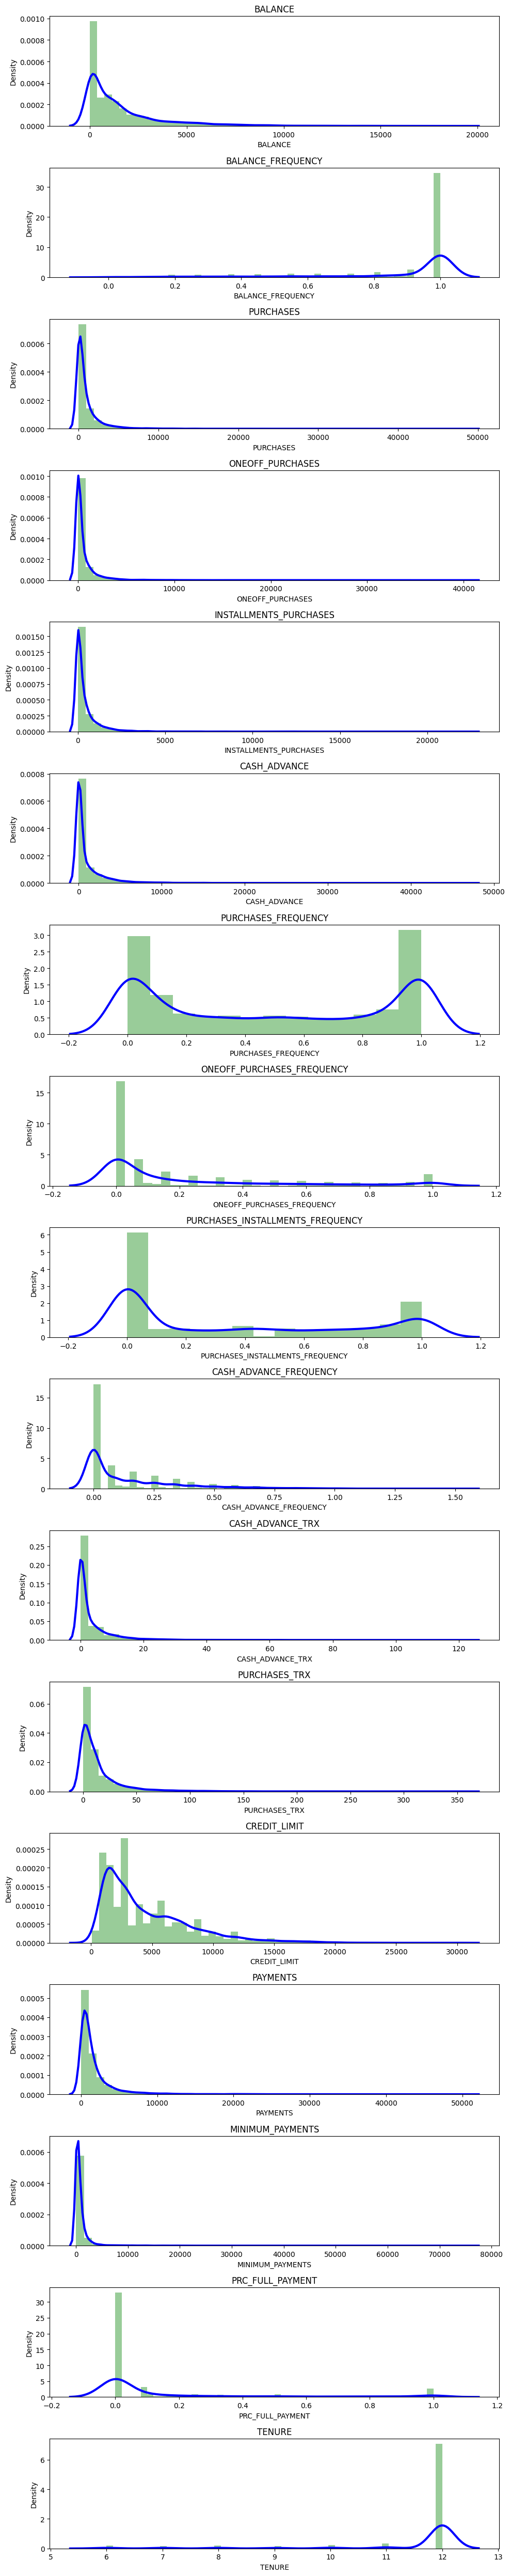

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure


plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()


In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'


In [ ]:
correlations = creditcard_df.corr()

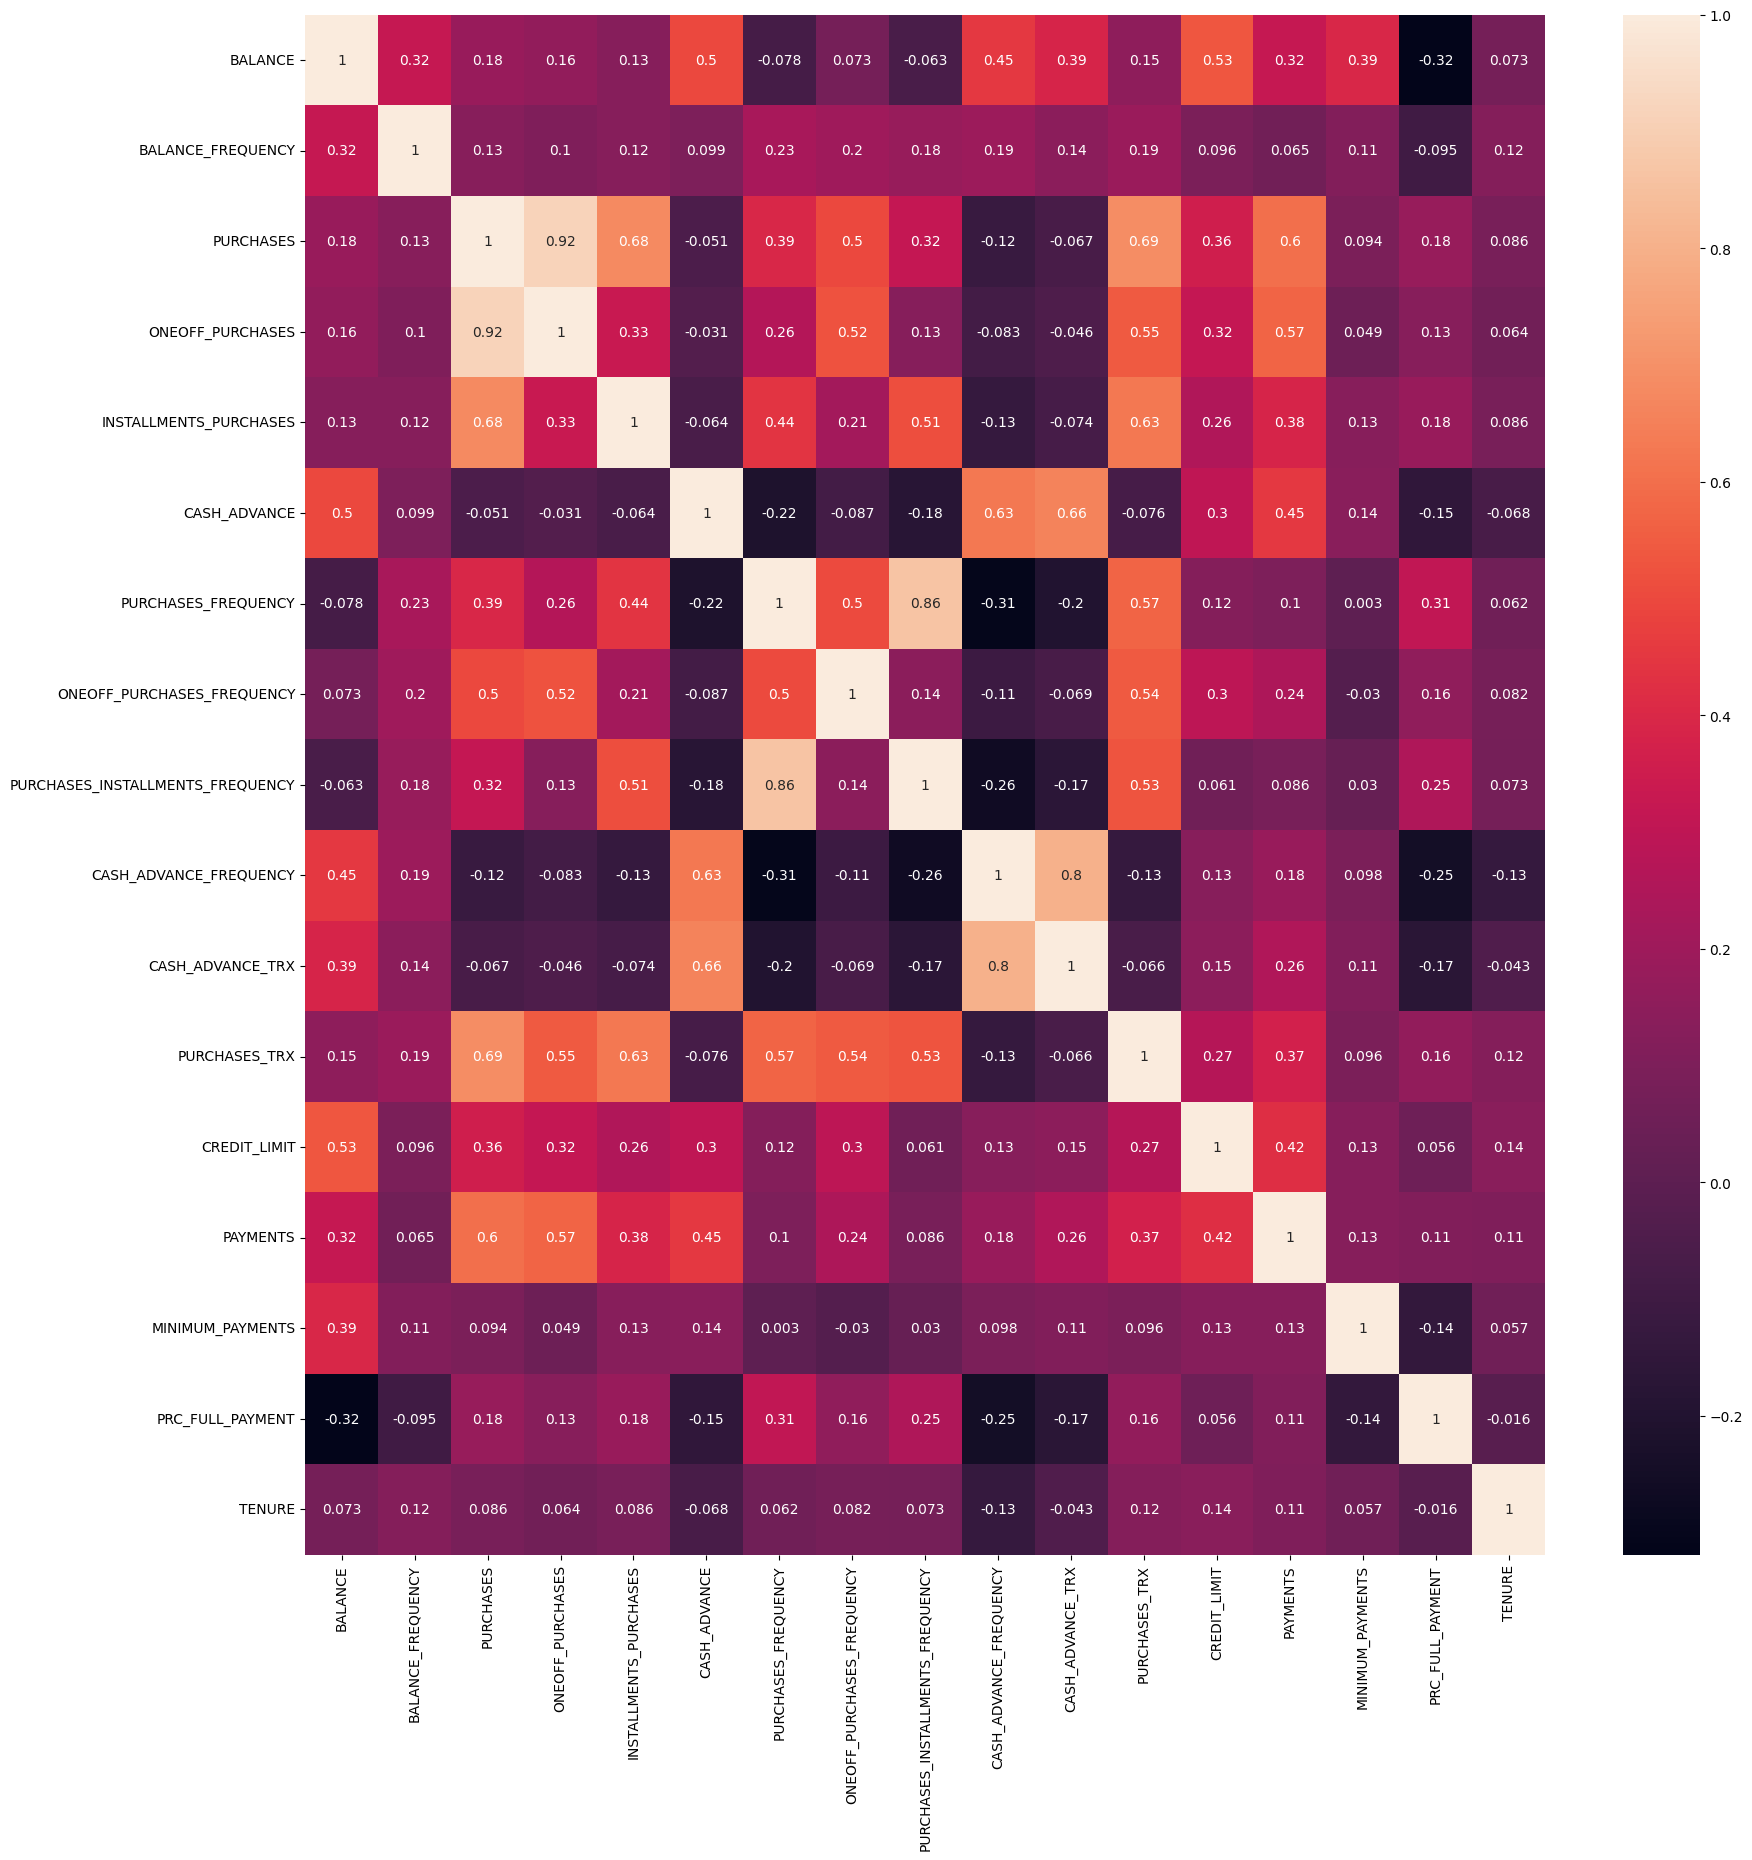

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show(1)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

Let's say we have two features: savings and age. We want to group customers based on these features. K-means clustering is a smart algorithm that does this without needing to visualize the data.

You provide the algorithm with the data points (savings and age), and it organizes them into groups. We don't need a target label; we only use the features (X and Y) of each data point.

K-means works by clustering data points that are similar to each other. It calculates the distance between points (using Euclidean distance) and groups similar points together. For example, it might group some data points as "blue," some as "green," and others as "red" based on their attributes.

K-means clustering algorithm with \( k = 2 \) clusters:

1. **Initialize Centroids**:
   - Choose 2 random data points from your dataset to be the initial centroids for the two clusters. These points don’t have to be perfect; they are just starting points.

2. **Assign Data Points to Centroids**:
   - For each data point in your dataset, calculate the distance between the data point and each centroid.
   - Assign each data point to the cluster with the nearest centroid.

3. **Update Centroids**:
   - Calculate the new centroid for each cluster. This is done by taking the average of all data points assigned to that cluster.
   - Update the centroid to this new average position.

4. **Repeat**:
   - Repeat steps 2 and 3 until the centroids no longer change significantly or the clusters no longer change. This means the algorithm has converged and found the best clustering.

So, the process is essentially:

1. Start with 2 random centroids.
2. Assign each data point to the nearest centroid.
3. Update centroids based on the data points assigned to them.
4. Repeat until the centroids stabilize.

This method allows K-means to group data points into clusters based on their similarity, even though the initial choice of centroids might be random.

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)



To calculate **WCSS** (Within-Cluster Sum of Squares) for 3 clusters:

1. **Find Centroids**: You have 3 centroids, one for each cluster.

2. **Measure Distances**: For each point in a cluster, find out how far it is from the centroid of that cluster.

3. **Square the Distances**: Square these distances to get rid of negative values.

4. **Add Up**: Sum up all the squared distances for each cluster.

5. **Combine**: Add the results from all clusters together to get the total WCSS.

In essence, WCSS helps measure how tightly data points are grouped around their centroids. Lower WCSS means better clustering.



**Finding the Optimal Number of Clusters:**

1. **Run K-means Clustering**:
   - Apply the K-means algorithm with different numbers of clusters (e.g., 1, 2, 3, ...).

2. **Calculate WCSS**:
   - For each number of clusters, calculate the Within-Cluster Sum of Squares (WCSS). This tells you how compact the clusters are.

3. **Plot WCSS**:
   - Create a plot with the number of clusters on the x-axis and the WCSS on the y-axis.

4. **Look for the Elbow**:
   - Find the point where the WCSS starts to level off. This is called the "elbow" of the plot. The number of clusters at this point is usually the optimal choice.

In summary, you choose the number of clusters where adding more clusters doesn’t significantly reduce WCSS. This helps you balance between having too few or too many clusters.

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [ ]:
# Let's scale the data first

# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)


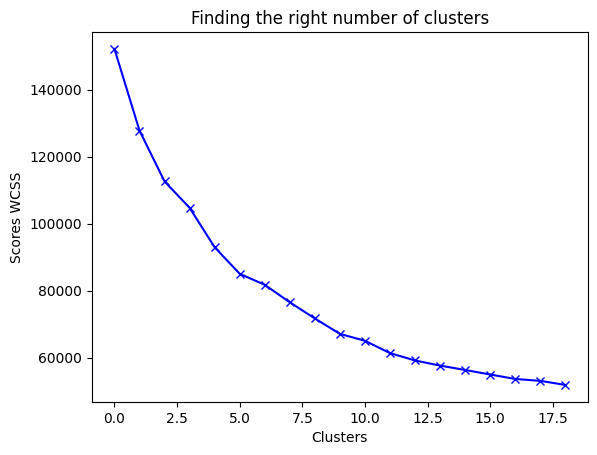

In [ ]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [ ]:

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.116519,0.479708,2.606654,1.876990,2.715183,-0.119900,1.172430,1.588057,1.292971,-0.259053,-0.119545,3.270661,1.342617,1.530104,0.622728,0.232297,0.335073
1,-0.201852,0.362235,-0.046419,-0.211884,0.279576,-0.307663,0.926341,-0.301314,1.109216,-0.359335,-0.295935,0.179038,-0.305984,-0.205712,0.066254,-0.342560,0.105803
2,1.596693,0.373311,-0.226586,-0.155606,-0.249943,1.973002,-0.501068,-0.203455,-0.454290,1.923843,1.876698,-0.285476,0.972573,0.761558,0.485069,-0.392968,-0.091683
3,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
4,-0.695224,-2.213321,-0.328231,-0.237156,-0.340259,-0.292507,-0.618590,-0.438424,-0.502697,-0.464902,-0.343572,-0.442162,-0.224188,-0.218787,-0.250238,0.056074,-0.161133
5,-0.707385,-0.018841,-0.055700,-0.266344,0.357106,-0.453105,0.841909,-0.430313,0.972523,-0.649957,-0.465820,0.028715,-0.205212,-0.254310,-0.295479,2.119087,-0.284929
6,-0.120729,0.399860,0.585510,0.725162,0.052008,-0.330097,0.990399,1.962485,0.158810,-0.415592,-0.338970,0.659372,0.475293,0.161210,-0.157419,0.417636,0.225255
7,-0.009050,0.372310,-0.361885,-0.239594,-0.415381,-0.068939,-0.892402,-0.390526,-0.800042,0.155264,-0.015236,-0.494805,-0.335348,-0.266072,-0.033240,-0.450466,-0.016984


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3888.414957,0.990909,6572.360935,3707.855981,2866.374112,727.435217,0.960903,0.676206,0.878297,0.083305,2.433022,96.006231,9379.439252,6162.645191,2315.447805,0.221657,11.965732
1,1144.336239,0.963081,904.029455,240.754137,663.885023,333.687582,0.862136,0.112570,0.805268,0.063238,1.229285,19.160045,3381.153762,1137.628450,1018.607847,0.053522,11.658910
2,4887.857386,0.965705,519.100516,334.162925,185.046914,5116.348740,0.289248,0.141763,0.183891,0.520125,16.055914,7.613978,8033.069404,3937.779262,1994.640211,0.038778,11.394624
3,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
4,117.424843,0.352955,301.933706,198.807025,103.376092,365.469876,0.242080,0.071667,0.164653,0.042112,0.904202,3.719328,3678.760975,1099.777744,281.037265,0.170115,11.301681
5,92.113324,0.872807,884.200518,150.360233,733.994404,28.688766,0.828249,0.074087,0.750943,0.005081,0.069948,15.423575,3747.805189,996.940219,175.604958,0.773511,11.136010
6,1313.187370,0.971994,2254.156099,1796.058418,458.097682,286.641355,0.887845,0.787905,0.427553,0.051980,0.935603,31.099356,6223.760141,2199.831661,497.347403,0.275866,11.818767
7,1545.637111,0.965468,230.031291,194.760628,35.443396,834.303432,0.132187,0.085956,0.046480,0.166214,3.144852,2.410820,3274.316463,962.891846,786.742710,0.021961,11.494590


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 2, 3, ..., 3, 1, 7], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


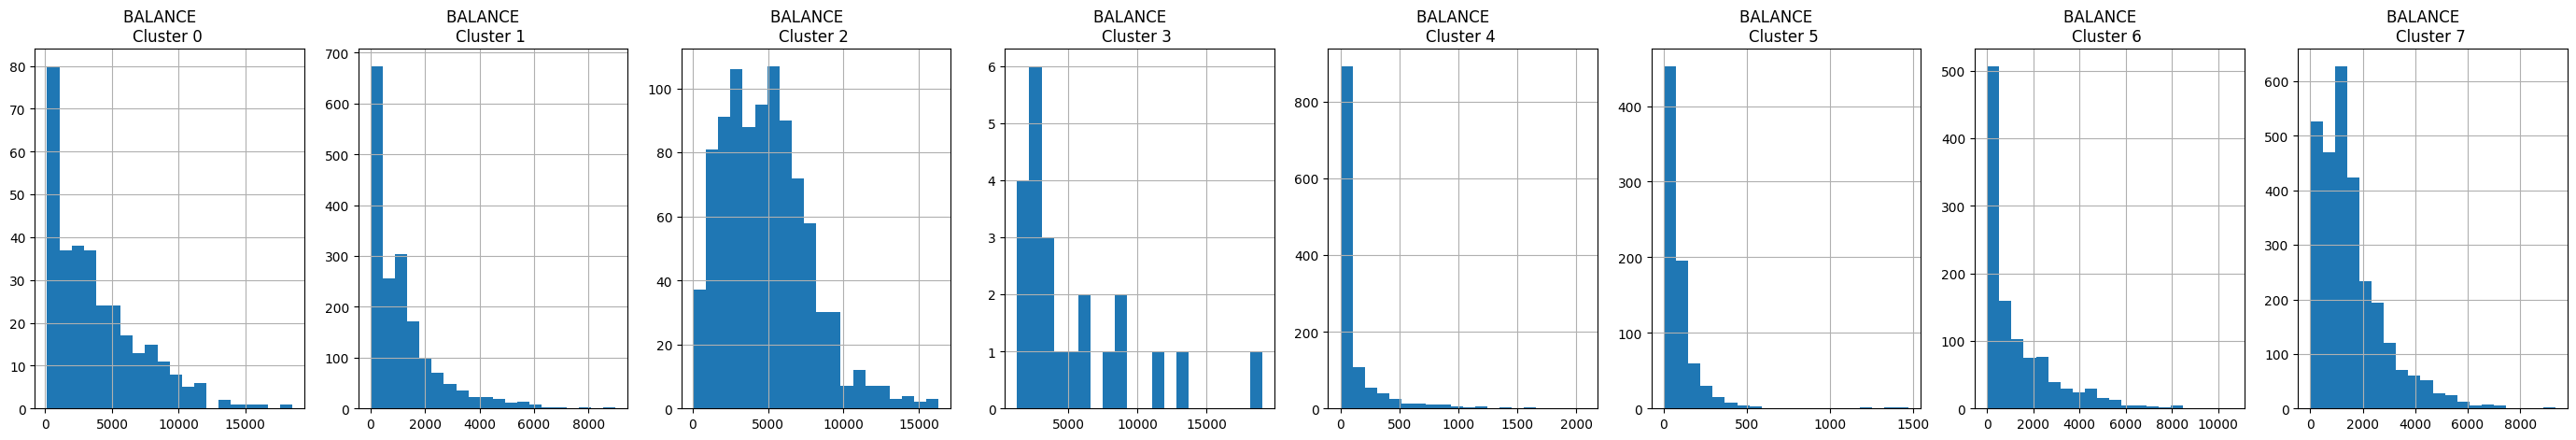

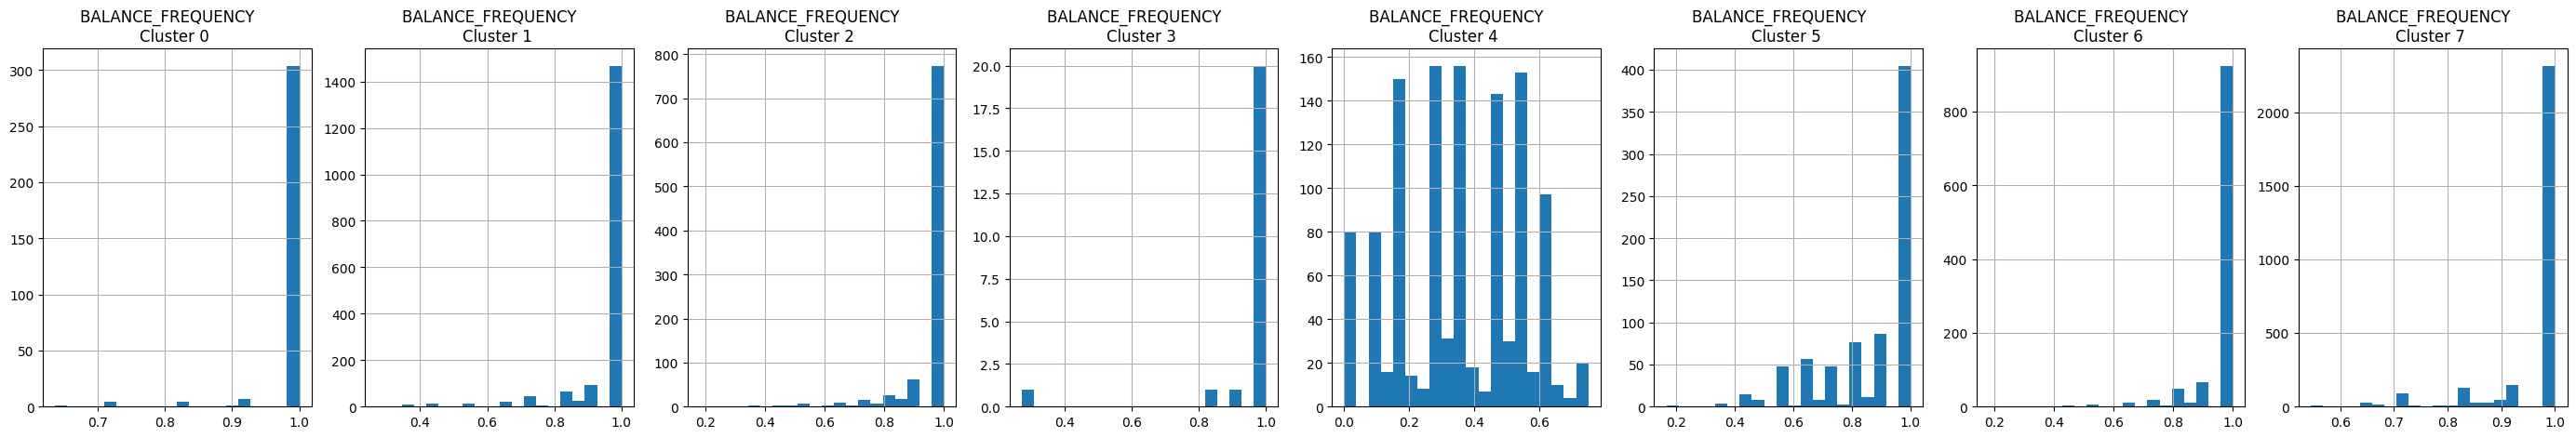

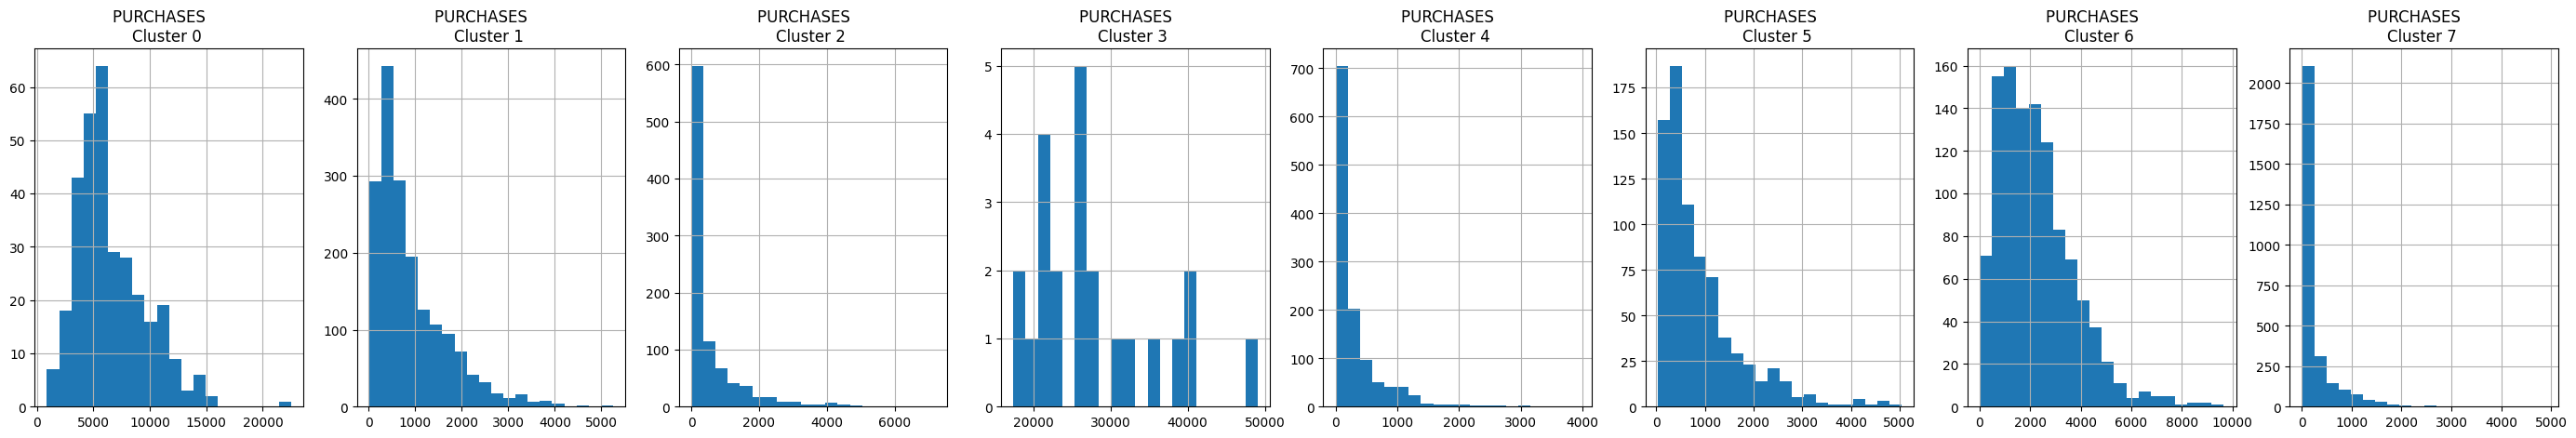

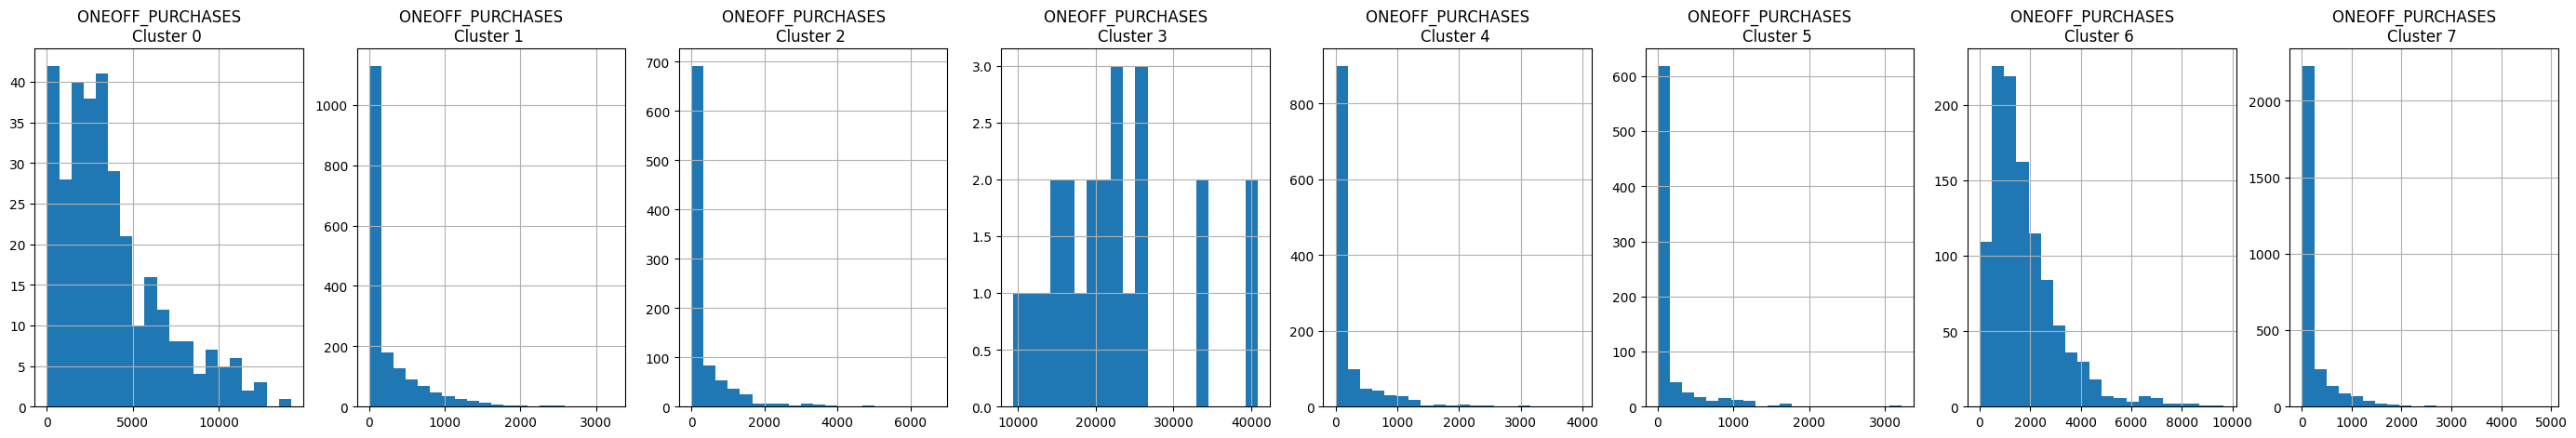

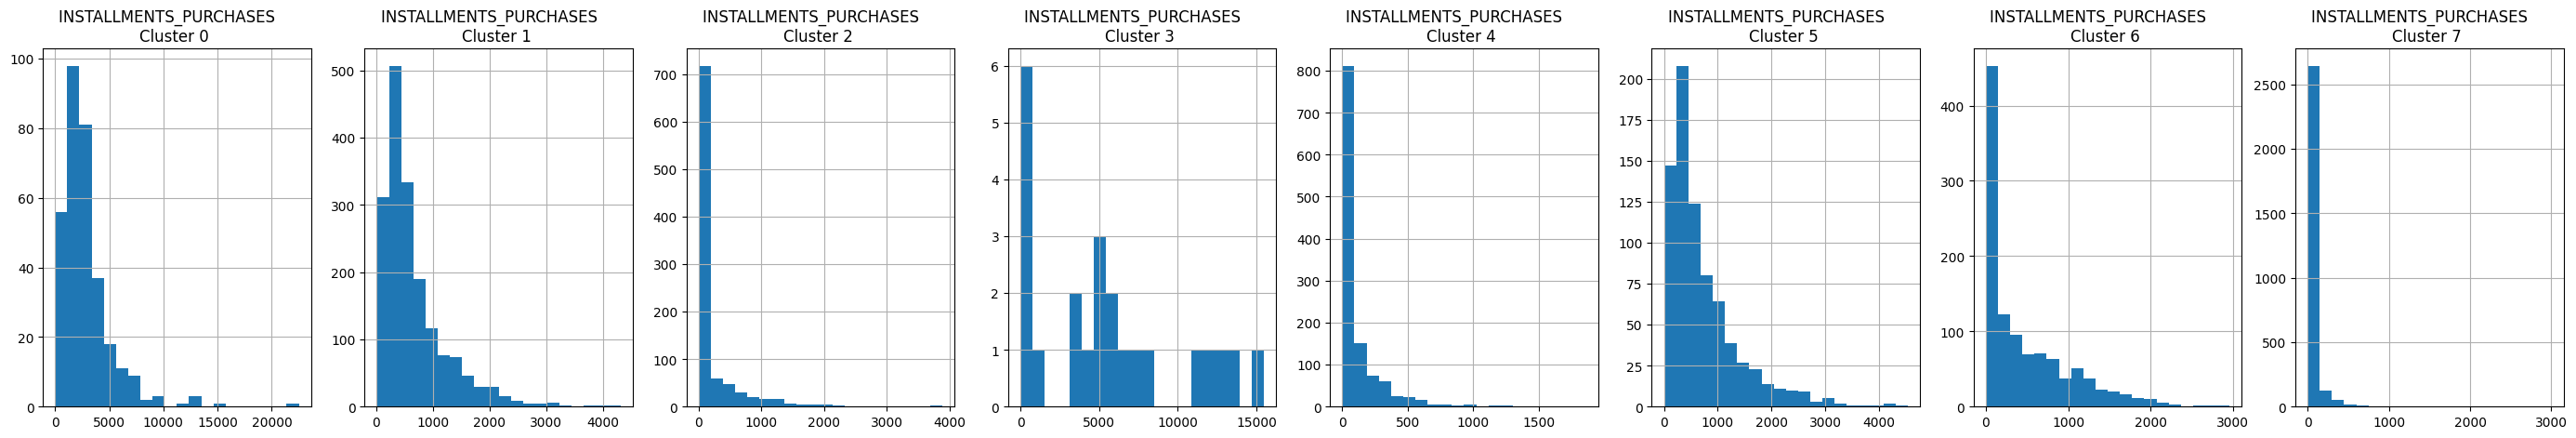

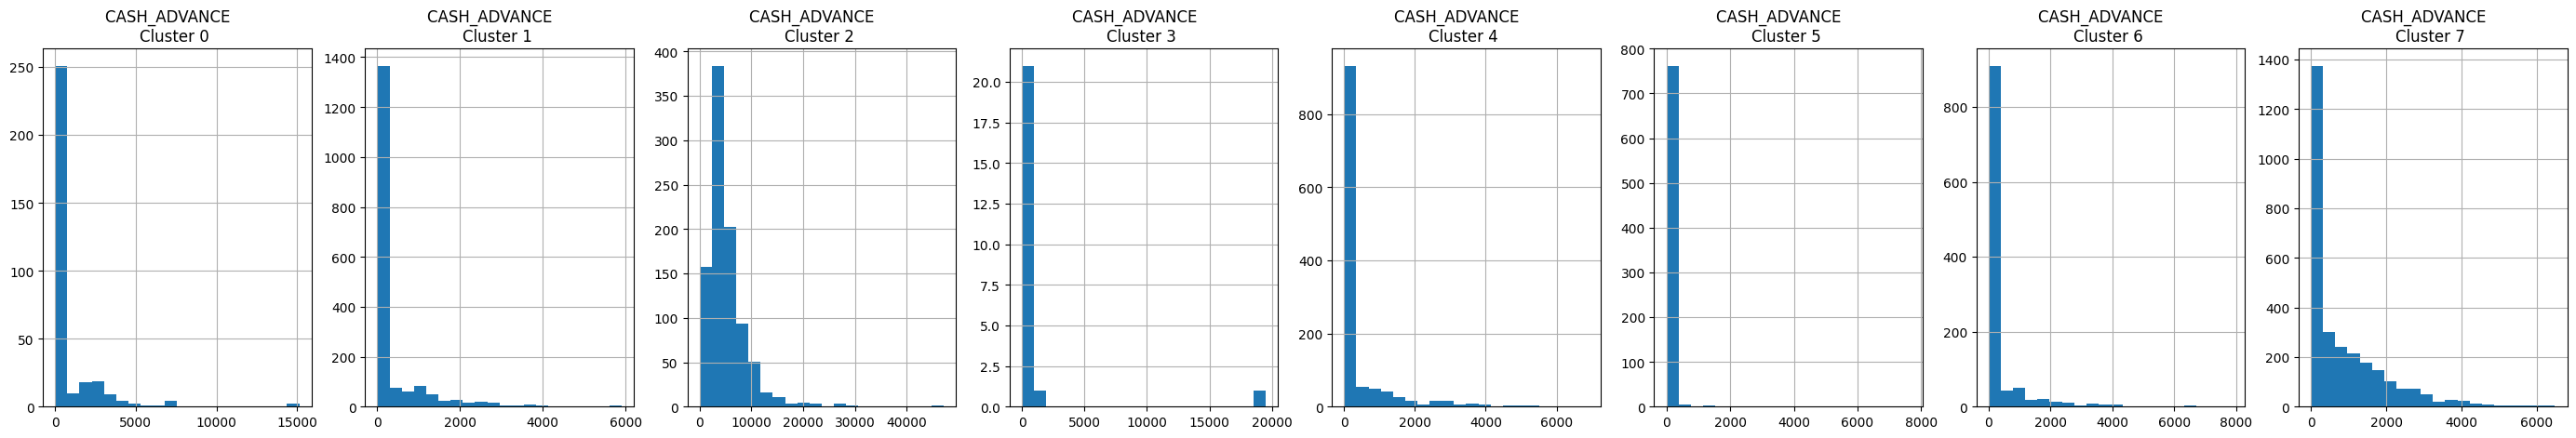

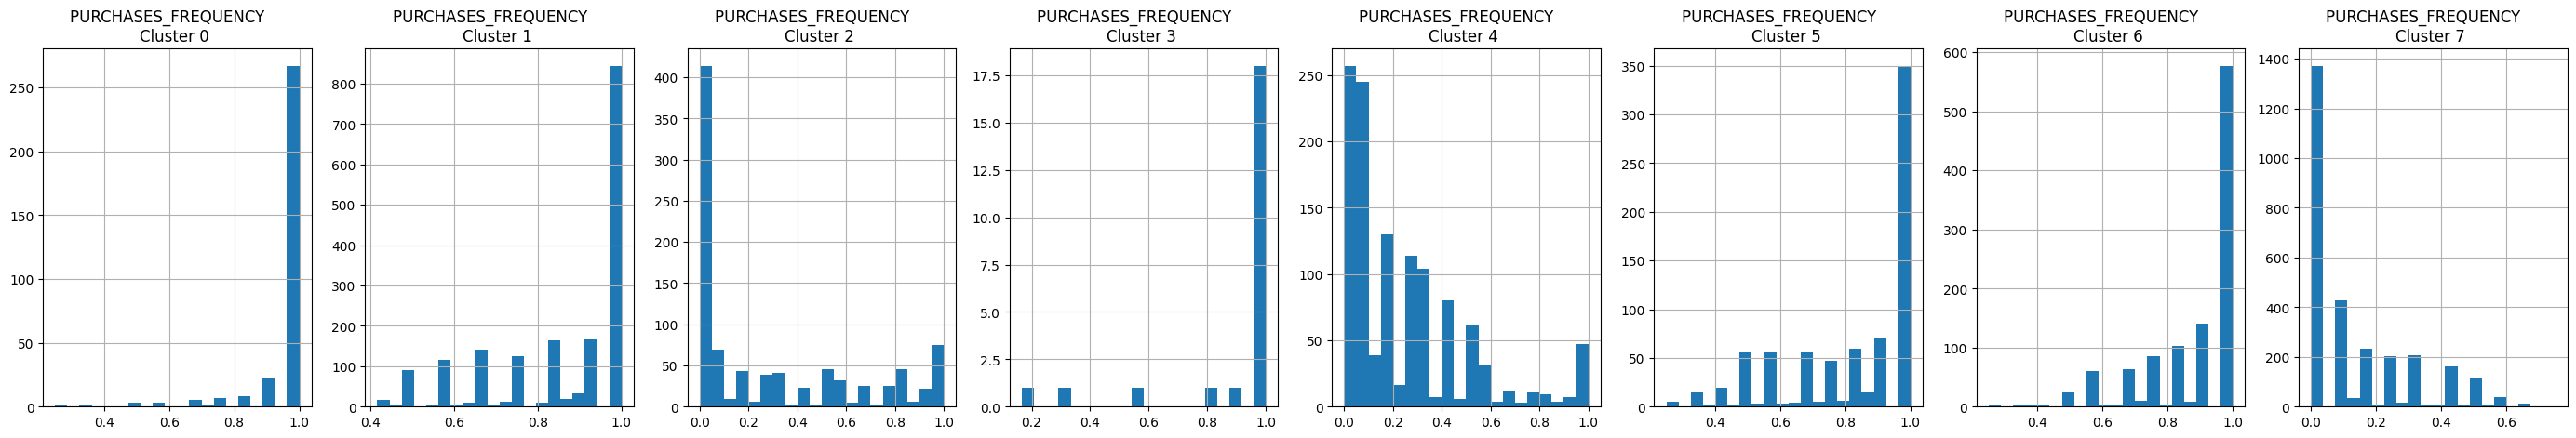

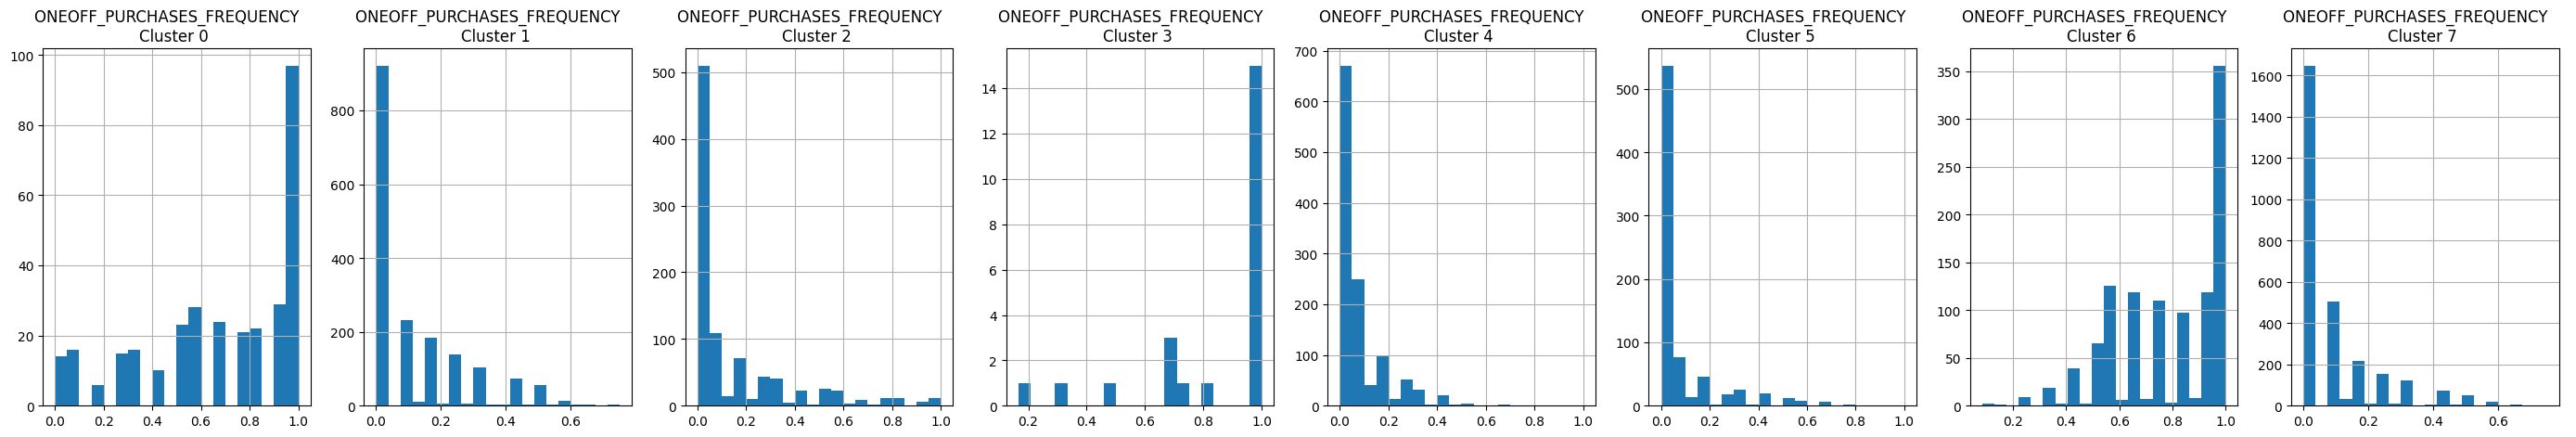

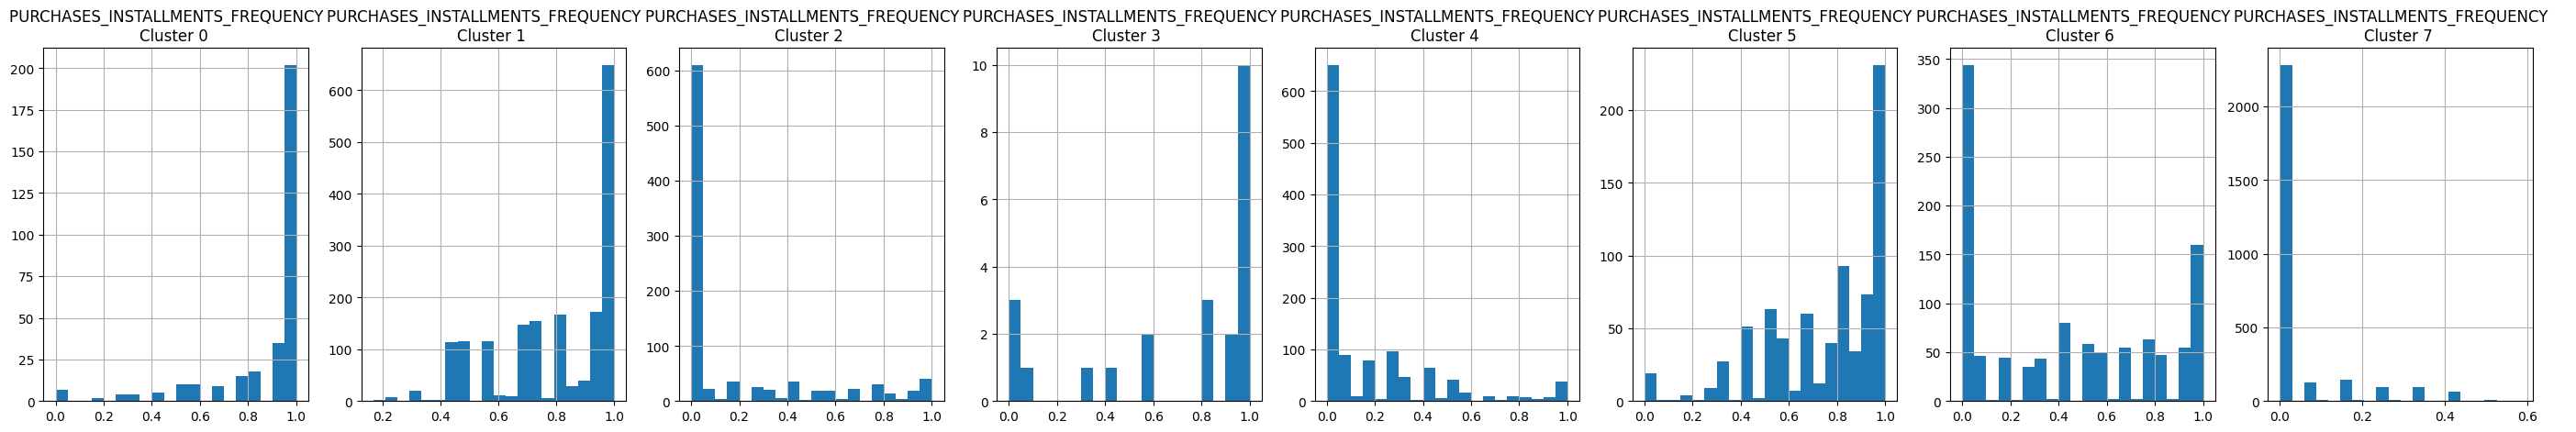

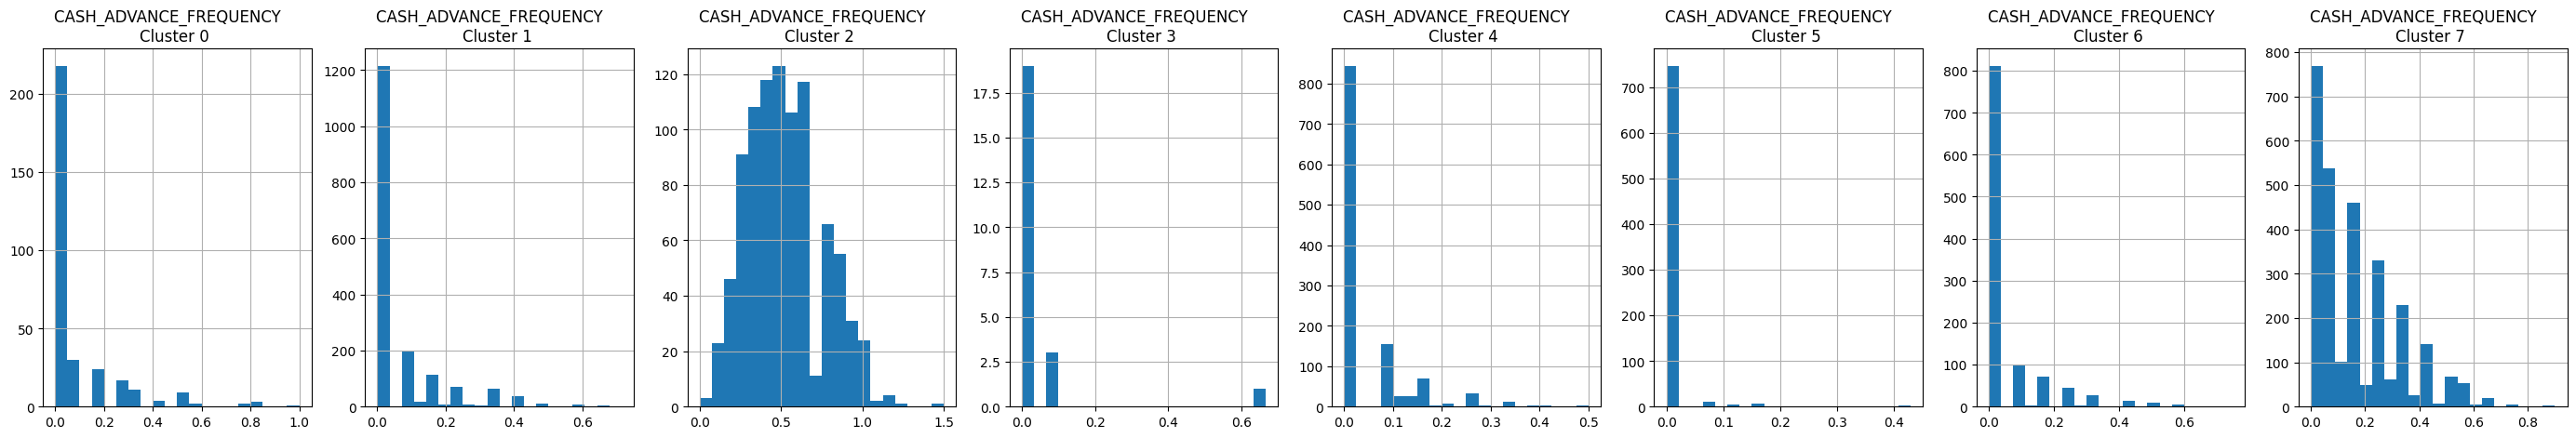

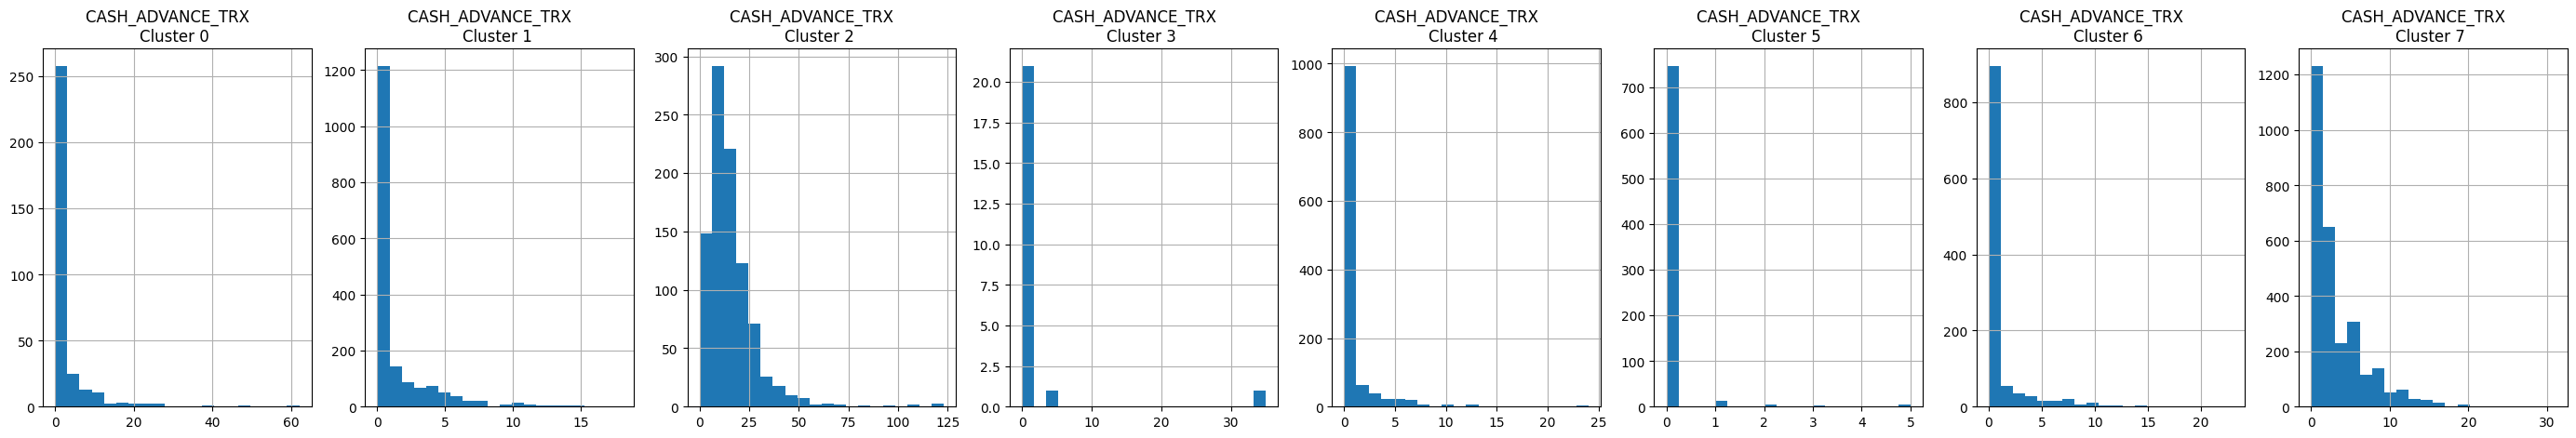

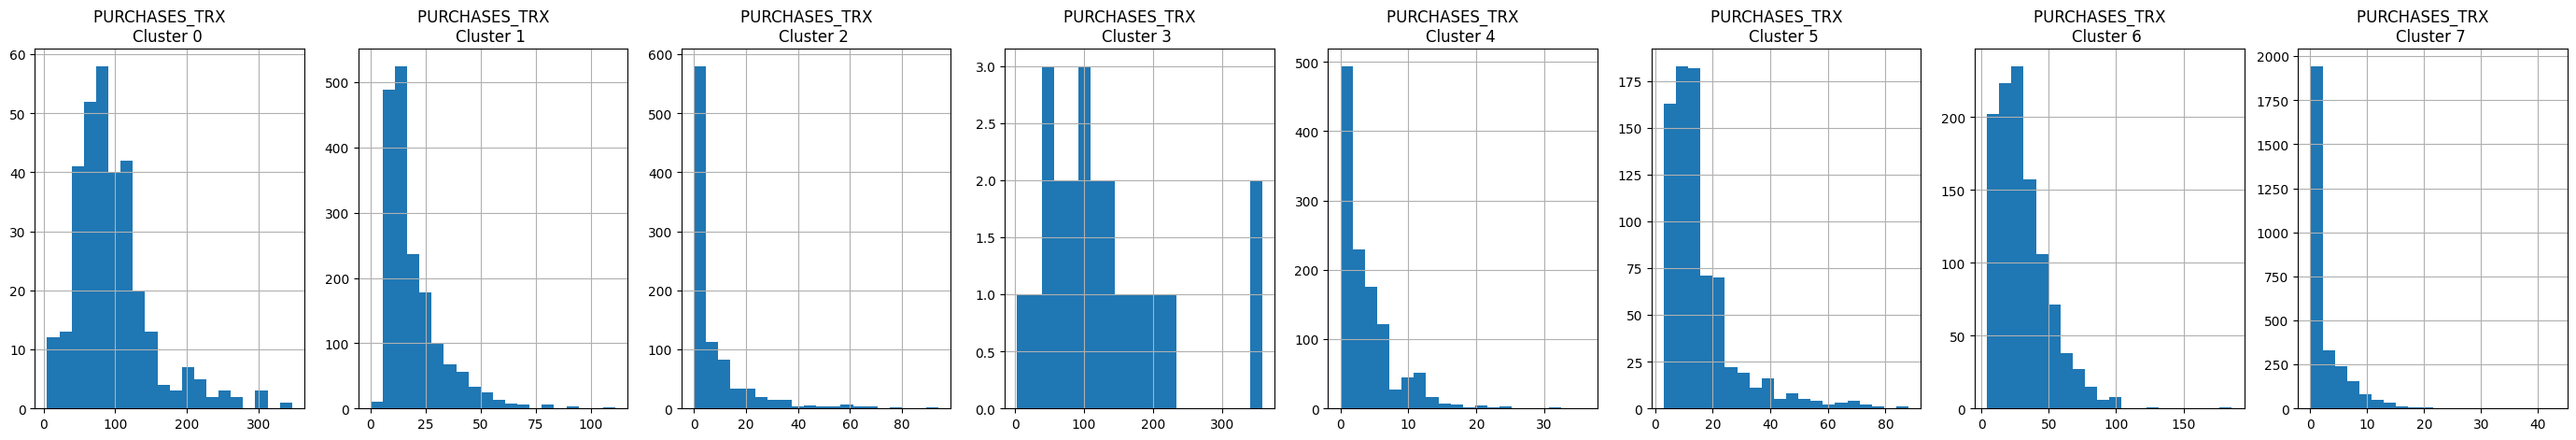

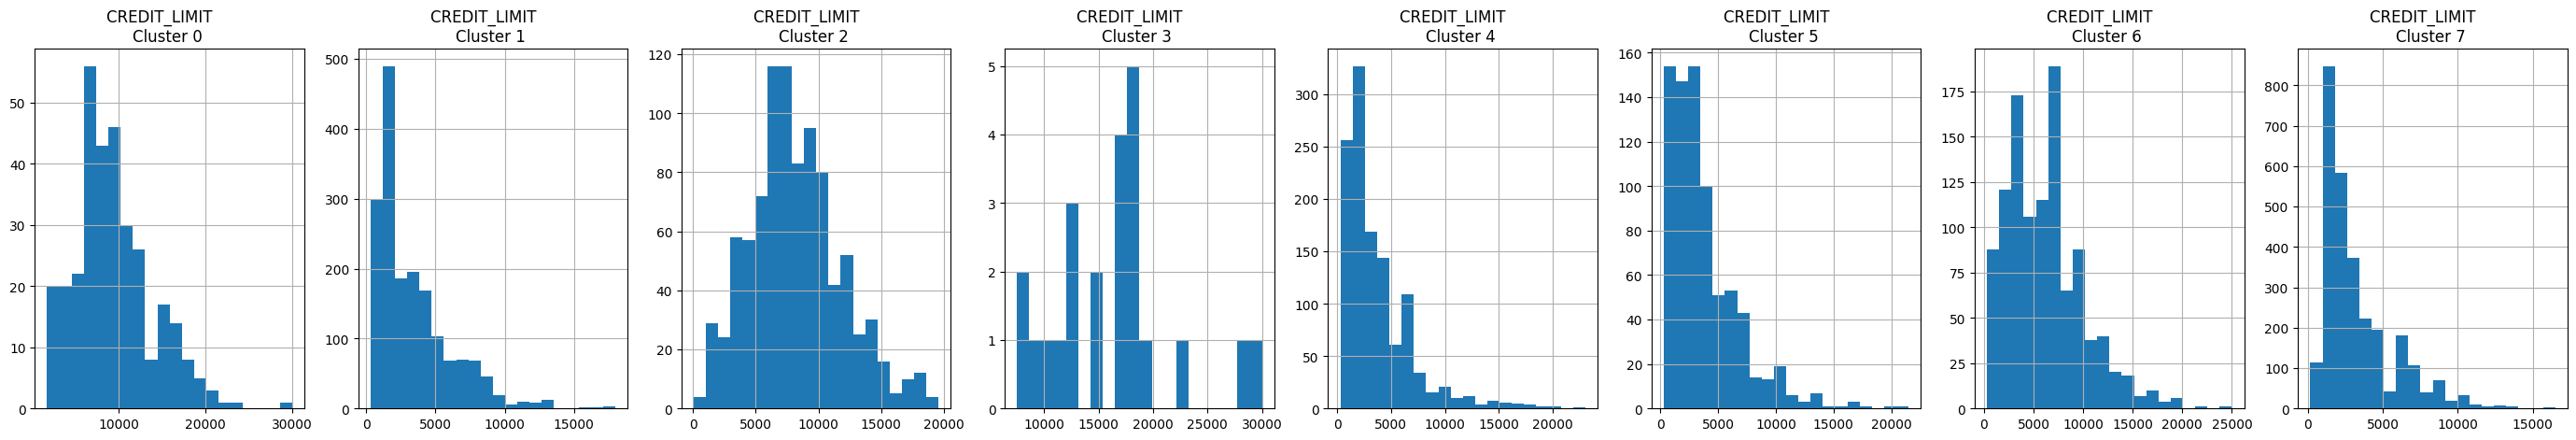

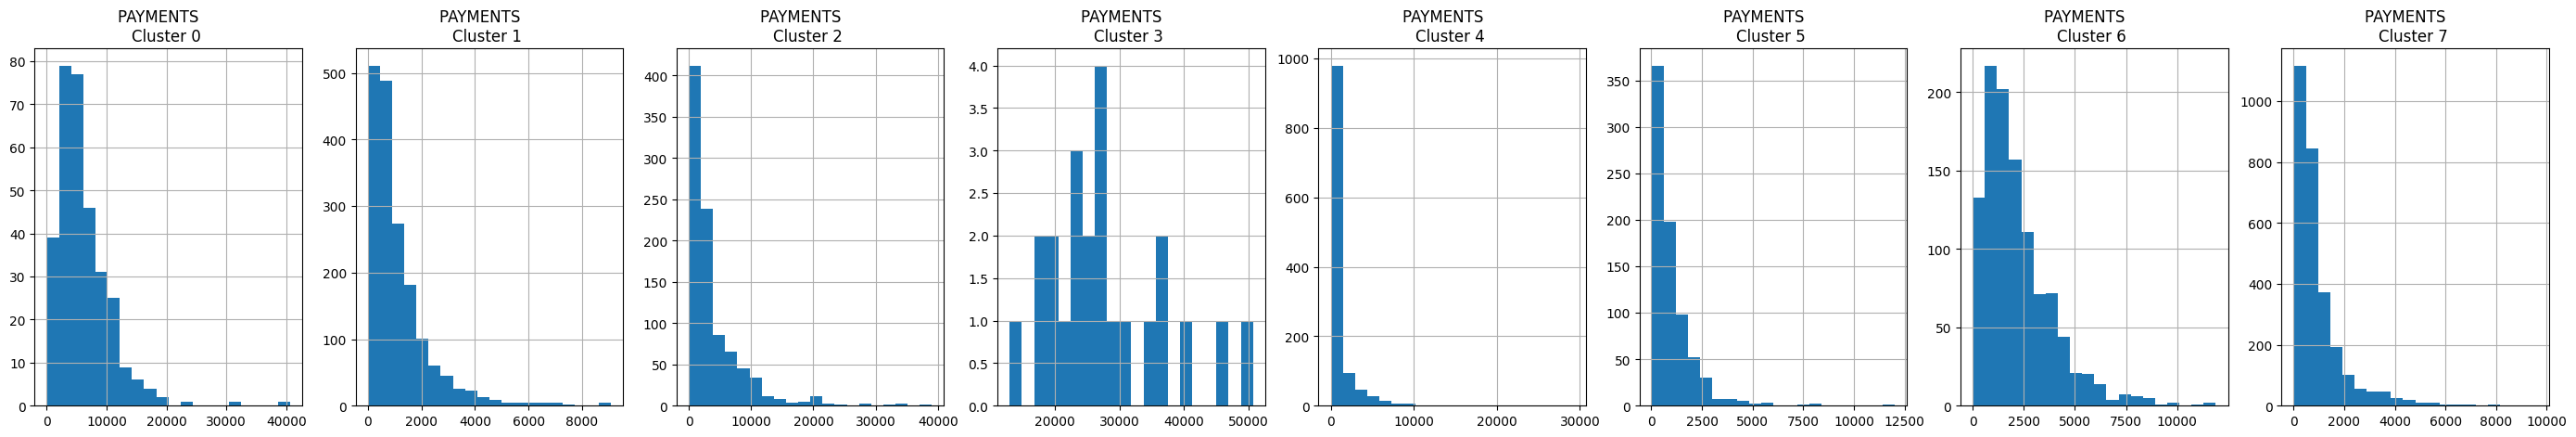

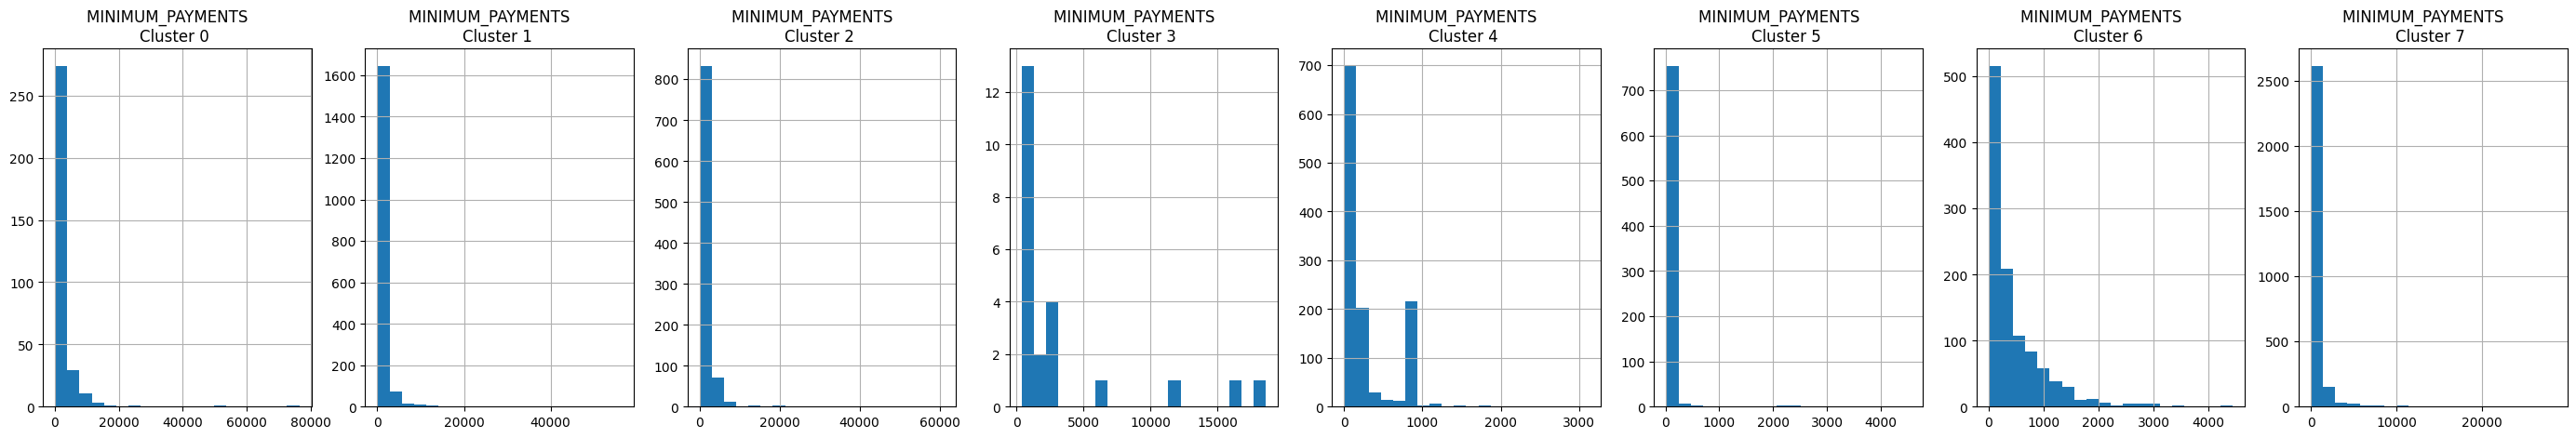

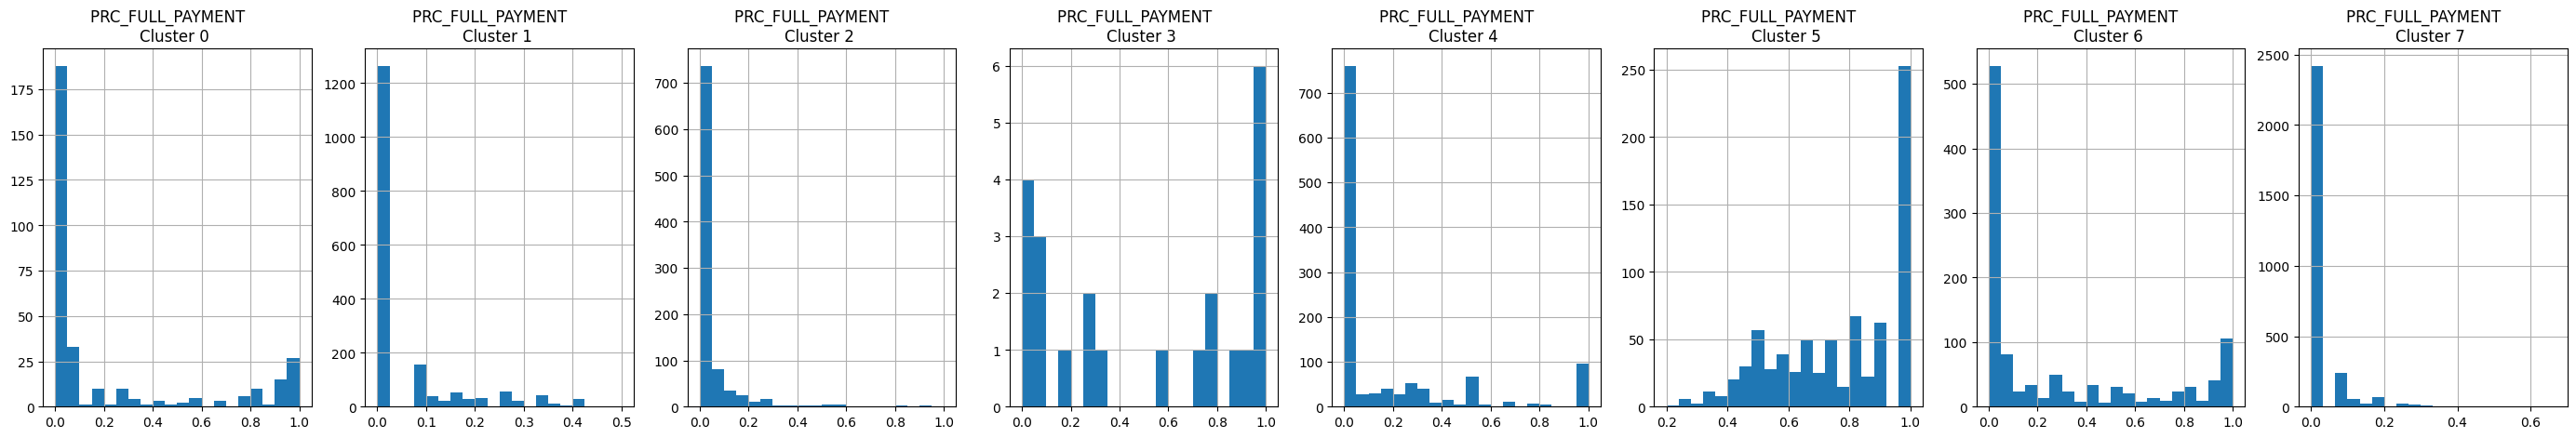

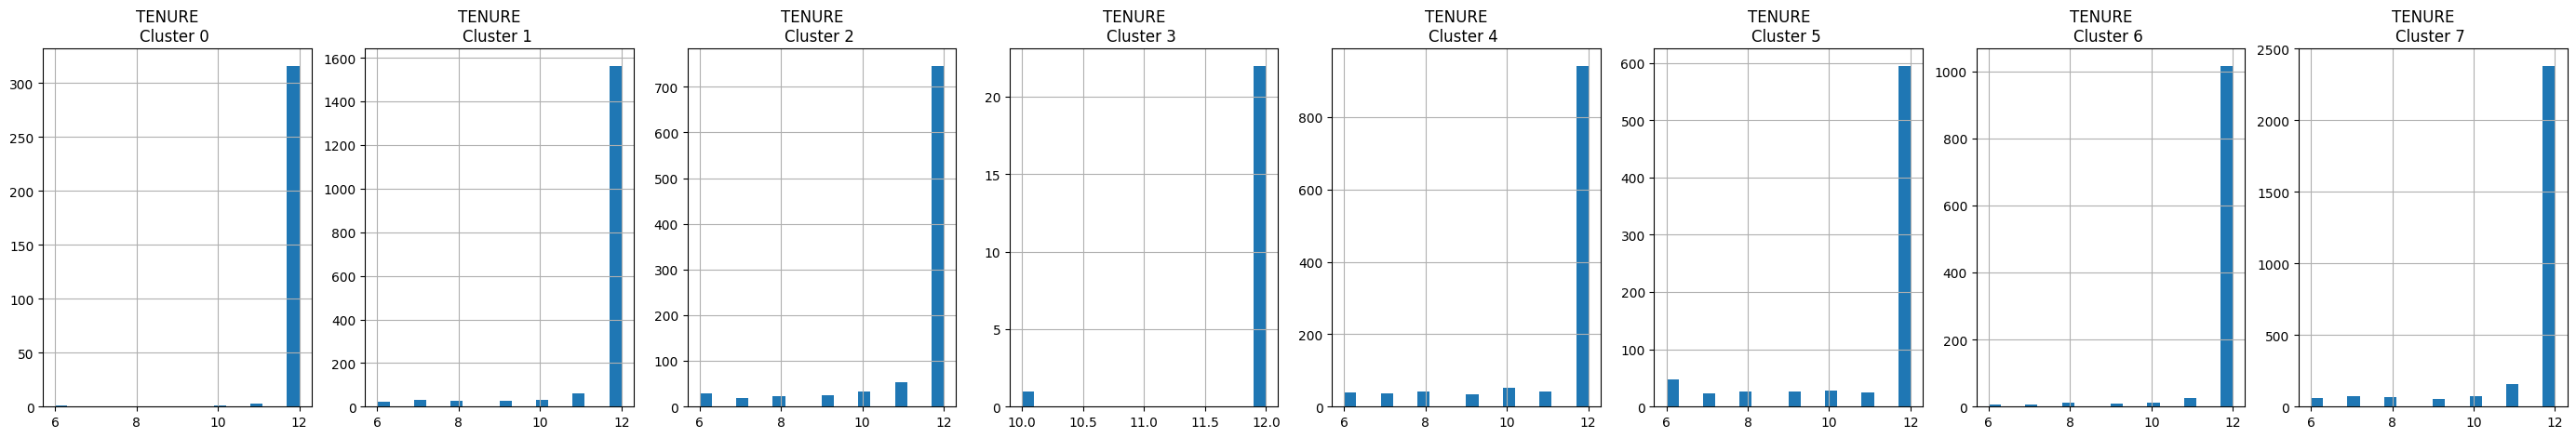

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALISE THE RESULTS

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [ ]:

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,7
1,-1.138295,2.506477,2
2,0.969684,-0.383520,6
3,-0.873628,0.043166,7
4,-1.599434,-0.688581,7


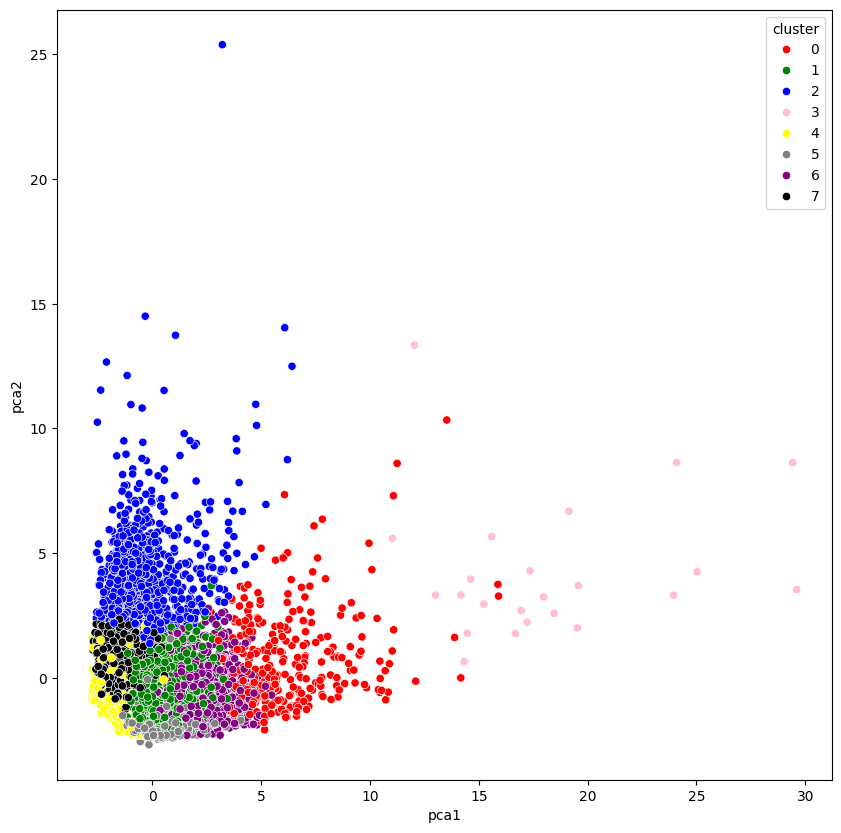

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()


### 1. **Variance and Information**:
   - **Variance** in statistics measures how much the data points in a dataset spread out from the mean (average) value. If a dataset has high variance, it means the data points are widely dispersed, which can indicate more variability or complexity in the data. In contrast, low variance indicates that the data points are clustered closely together around the mean.
   - In PCA, variance is used as a proxy for **information** because features with more variance tend to contain more distinguishing power. Features with low variance may not differentiate between data points as effectively.

### 2. **PCA's Goal**:
   - The goal of PCA is to reduce the dimensionality of a dataset while **preserving as much variance (information)** as possible. It does this by transforming the data into new dimensions (called principal components), where each new component captures a portion of the variance.
   
   - The first principal component (**PC1**) captures the largest variance possible from the dataset, which means it holds the most "information" or important features that explain the dataset's spread. The second principal component (**PC2**) captures the second largest amount of variance, and so on.

### 3. **Why Variance is Information in PCA**:
   - Imagine you have a dataset with several features, but some features show little variation across data points. This low variation suggests those features may not add much value in distinguishing between the points (they carry less "information").
   
   - PCA identifies the axes (principal components) that capture the largest variance and treats these as the most **informative** directions. Data points that lie far from the origin in these directions likely represent important patterns or trends.

   - For example:
     - If you have a dataset of customer spending patterns, and one principal component shows a wide spread (high variance), it might mean there's a clear distinction between different types of spenders (e.g., high spenders vs. low spenders). This separation carries useful information.

### 4. **Visual Example**:
   - In your plot, the **x-axis (pca1)** and **y-axis (pca2)** represent the first two principal components, which capture the most variance. The wider the spread of points along these axes, the more variance (information) these components are capturing.
   - By reducing the data to just these two components, you're retaining as much of the important "information" as possible while simplifying the data for easier visualization or analysis.

### Key Takeaway:
- **Variance as Information** in PCA means that the principal components that capture the most variance are considered to carry the most meaningful distinctions between data points. The higher the variance in a principal component, the more "information" it contains about the dataset’s structure.

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)



### What Are Autoencoders?

At their core, **autoencoders** are a type of **neural network** used for **data compression** and then **reconstruction**. Imagine them as a tool that learns to take a large amount of information, compress it into a smaller form (like zipping a file), and then tries to **recreate the original data** from that compressed version.

Here’s an analogy:

- **Compression** (the "encoder" part): Imagine you have a large, detailed picture, but you only have a small amount of storage. So you need to shrink it down, keeping as much important information as possible.
- **Reconstruction** (the "decoder" part): Once the picture is stored in its small form, you want to bring it back to its original size and quality.

In reality, autoencoders are a bit like this: they take in high-dimensional data (lots of details), squeeze it down into a **compressed version**, and then try to **rebuild** or reconstruct it as closely as possible to the original.

### How Autoencoders Work:

1. **Encoder**:
   - This is the first half of the autoencoder. Its job is to **compress the input data** into a smaller, more compact form.
   - For example, if you had a 1,000-dimensional dataset (lots of features), the encoder might shrink it down to just 10 dimensions, keeping the most **essential features**.

2. **Bottleneck**:
   - This is the **compressed version** of your data, also called the **latent space** or **code**. It holds the compressed information.
   - Think of this like a summary of the data that only keeps the most important parts.

3. **Decoder**:
   - This is the second half of the autoencoder. Its job is to **take that compressed version** and **reconstruct** the original data.
   - The decoder tries to recreate the original data from the compressed representation as accurately as possible.

### Why Do We Care About Autoencoders?

1. **Dimensionality Reduction**:
   - Autoencoders can be used to reduce the number of features or dimensions in a dataset, just like **PCA** does. But they can handle **non-linear** relationships better than PCA, making them more powerful for certain tasks.

2. **Data Denoising**:
   - Autoencoders can learn to **ignore noise** in data. Imagine you had a noisy, blurry image, and you wanted to clean it up. An autoencoder can learn to compress the image and then reconstruct it without the noise, effectively **denoising** the data.

3. **Anomaly Detection**:
   - Autoencoders can be used to **detect anomalies** or **outliers** in data. If the autoencoder has learned to compress and reconstruct data in a certain way, it will struggle to reconstruct data that is very different (like an anomaly), which will be a clue that something is unusual about that data point.

### Visualizing Autoencoders:

1. **Input**:
   - Think of a simple image of a cat. The autoencoder takes this image as input.

2. **Encoding (Compressing)**:
   - The encoder squeezes the image down, removing some details, but keeps the **key patterns** (like the overall shape, colors, or textures).

3. **Latent Space (Bottleneck)**:
   - This is a compressed representation of the image. The picture is simplified, and a lot of unnecessary details are removed.

4. **Decoding (Reconstructing)**:
   - The decoder tries to take that compressed version and recreate the original image of the cat. Ideally, it looks very similar, but it might not capture every small detail.

### An Example in Simple Terms:

Let’s say you have a bunch of **handwritten digits** (like numbers written by people). An autoencoder will:

- **Encoder**: Learn to shrink down each digit image (which has many pixels) into a small summary, like "this looks like a 5" or "this looks like a 9".
- **Decoder**: Then it will try to recreate that original digit from this small summary. Over time, it gets very good at doing this.

Even though the autoencoder learned a **smaller** (compressed) version of the digit, it can still recreate it well.

### Key Takeaways:
- **Autoencoders** are used to take complex data, compress it, and then reconstruct it.
- They are great for tasks like dimensionality reduction, denoising data, and anomaly detection.
- The idea is to keep the **most important features** of the data during compression, and then try to **recreate the original** from that compressed form.


# APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [ ]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution


x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.7501
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 0.4197
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.2622
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.2454
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.1937
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.1713
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.1601
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.1479
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1395
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.1229
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.1226
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - loss: 0.1170
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.1048
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0989
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0911
Epo

In [ ]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          20,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 17)                  │           8,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
pred.shape

(8950, 10)

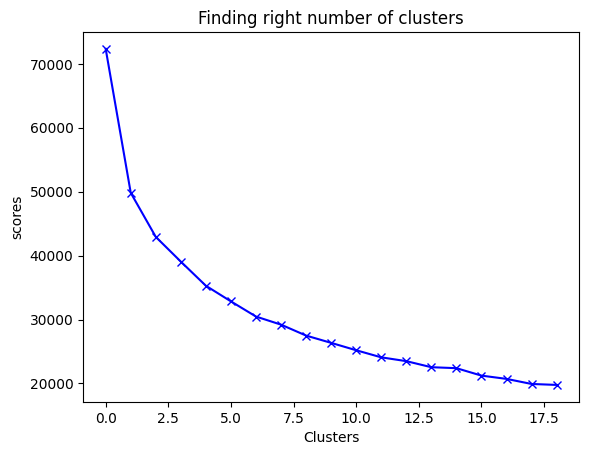

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

<ipython-input-147-9bc02d7d0a2a>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-147-9bc02d7d0a2a>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


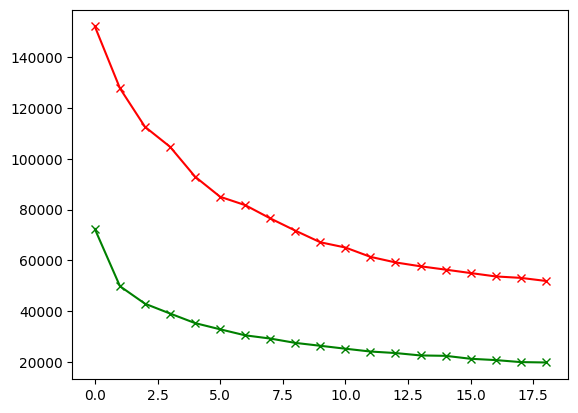

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')
plt.show()

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.713625,0.325828
1,2.492575,-0.241218
2,-1.819749,-0.163798
3,-1.231302,0.342243
4,-1.725402,0.225591


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.713625,0.325828,0
1,2.492575,-0.241218,2
2,-1.819749,-0.163798,0
3,-1.231302,0.342243,0
4,-1.725402,0.225591,0


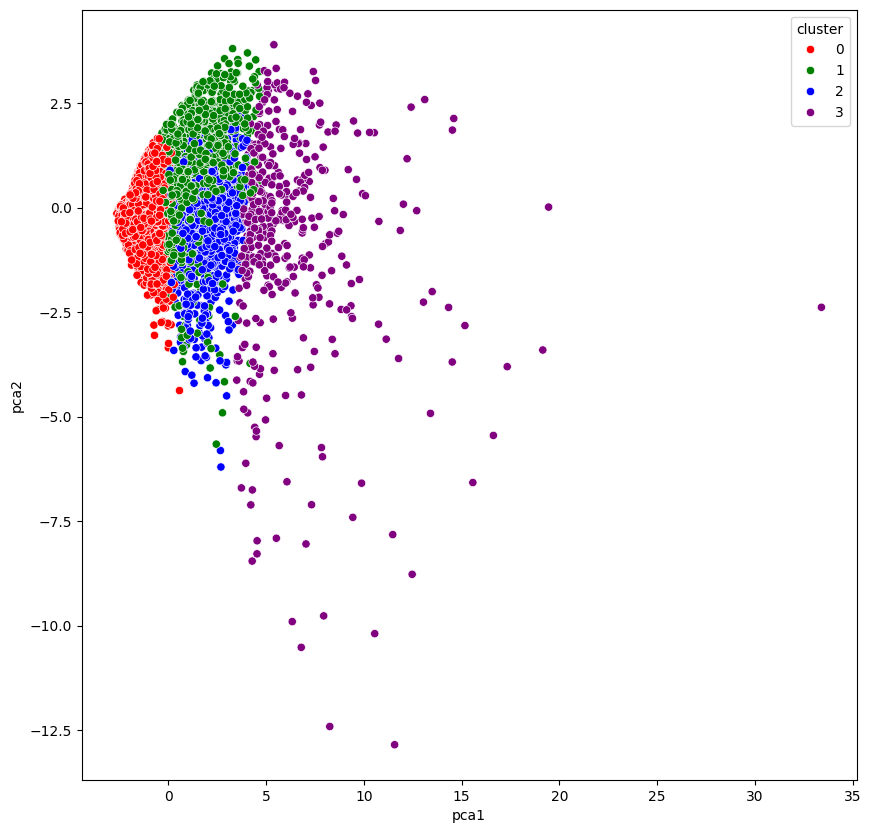

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','purple'])
plt.show()

Clusters 0, 1, and 2 are more tightly packed, while cluster 3 is more dispersed, indicating greater variation within that group. This clear separation of clusters demonstrates the effectiveness of the K-means algorithm in identifying distinct groups within the data.